In [36]:
# set up Git in Colab
!git config --global user.email "gianghoangnguyenngoc@gmail.com"
!git config --global user.name "ChuoiUhuhu0727"

# clone repo
!git clone https://github.com/ChuoiUhuhu0727/Data-Analytics

Cloning into 'Data-Analytics'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), done.


In [37]:
# move colab file to target path
import os
target_dir = '/content/yourrepo/Data-Analytics/Session3/Week7'
os.makedirs(target_dir, exist_ok=True)
!mv /content/Lesson7_Practice.ipynb {target_dir}/

mv: cannot stat '/content/Lesson7_Practice.ipynb': No such file or directory


In [38]:
import os
print(os.listdir('/content'))

['.config', 'yourrepo', 'Data-Analytics', 'sample_data']


# Pseudo code example
Initialize K centroids randomly

Repeat:
  * Assign each data points to the nearest centroids
  * Update the centroids as the mean of the points assigned to it

Until centroids do not change

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Sample data
x = np.array([[1,2], [1,4], [1,0],
             [10,2], [10,4], [10,0]])

# Create KMeans instance with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

# Predict cluster for each data point
print(kmeans.labels_)

# Get cluster centroids
print(kmeans.cluster_centers_)

[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


In [ ]:
# suggested coding structure

# suggested functions
initialize_centroids()
update_centroids()
visualize_clusters()

In [1]:
# 1. import libraries
import numpy as np
import matplotlib.pyplot as plt

# 2. preprocess data
x = ...

# 3. initialize centroids
k = 3
centroids = initialize_centroids(x, k)

# 4. refine centroids
for loops in range(max_iters):
  # divide data into clusters
  clusters = assign_clusters(x, centroids)
  new_centroids = update_clusters(x, clusters, k)
  if np.all(centroids == new_centroids):
    break
  centroids = new_centroids

# 5. visualize new clustes
visualize_clusters(x, clusters, centroids)

NameError: name 'initialize_centroids' is not defined

**Exercise 1:** Basic K-means on Synthetic Data
Task:
Generate a simple 2D dataset with three clusters using numpy. Apply k-means clustering (using scikit-learn or your own implementation) and plot the results with cluster assignments and centroids.

Steps:

1. Generate 3 groups of 2D points centered at (1,1), (5,5), and (9,1).
2. Run k-means with k=3.
3. Visualize the data points, colored by their cluster, and show the centroids.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 3 groups of 2D centered groups
cluster1 = np.random.randn(50, 2) + np.array([1, 1])

cluster2 = np.random.randn(50, 2) + np.array([5, 5])

cluster3 = np.random.randn(50, 2) + np.array([9, 1])

In [5]:
cluster1.shape

(50, 2)

In [22]:
# way 1: use scikit-learn
from sklearn.cluster import KMeans

# create and fit models
kmeans = KMeans(n_clusters=3).fit(cluster1)

# label data
labels = kmeans.labels_

# get the centroids
centroids = kmeans.cluster_centers_

In [14]:
cluster1[labels].mean(axis=0)

array([0.4403834, 1.9142559])

In [15]:
cluster1[labels]

array([[ 0.42254665,  2.81638722],
       [ 0.42254665,  2.81638722],
       [ 1.42632582,  1.96701334],
       [-0.36438946,  1.01827845],
       [-0.36438946,  1.01827845],
       [ 0.42254665,  2.81638722],
       [-0.36438946,  1.01827845],
       [-0.36438946,  1.01827845],
       [ 1.42632582,  1.96701334],
       [ 1.42632582,  1.96701334],
       [ 0.42254665,  2.81638722],
       [ 0.42254665,  2.81638722],
       [-0.36438946,  1.01827845],
       [ 1.42632582,  1.96701334],
       [-0.36438946,  1.01827845],
       [ 1.42632582,  1.96701334],
       [ 1.42632582,  1.96701334],
       [-0.36438946,  1.01827845],
       [ 1.42632582,  1.96701334],
       [-0.36438946,  1.01827845],
       [ 1.42632582,  1.96701334],
       [ 0.42254665,  2.81638722],
       [ 1.42632582,  1.96701334],
       [ 0.42254665,  2.81638722],
       [ 0.42254665,  2.81638722],
       [-0.36438946,  1.01827845],
       [-0.36438946,  1.01827845],
       [-0.36438946,  1.01827845],
       [-0.36438946,

In [25]:
# assign each point to the nearest centroid

# calculate distance to each centroid
distances = np.linalg.norm(cluster1[:, np.newaxis] - centroids, axis=2) # shape: (n_samples, k)

# each point gets the index of its nearest centroid
labels = np.argmin(distances, axis=1)

In [26]:
# update centroid to be the mean
# of the points assigned to it
new_centroids = np.array([cluster1[labels == i].mean(axis=0) for i in range(k)])

new_centroids

array([[-1.70726645, -0.32899838],
       [ 1.36850017,  2.10061687],
       [ 0.66867082,  0.26782138]])

In [27]:
# repeat till centroids
# stop changing
if np.allclose(centroids, new_centroids):
  break
centroids = new_centroids

SyntaxError: 'break' outside loop (ipython-input-4255267724.py, line 4)

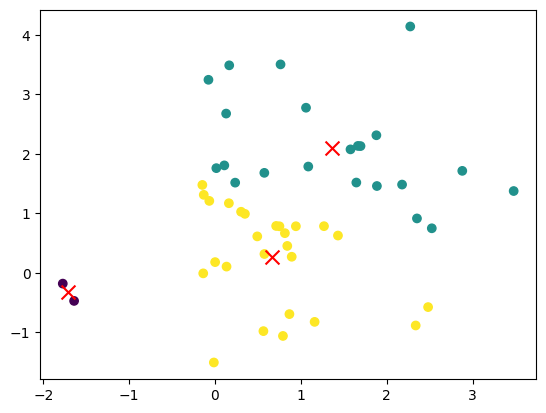

In [31]:
# visualize results
plt.scatter(cluster1[:, 0], cluster1[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)

**Revised version**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 3 groups of 2D centered groups
cluster1 = np.random.randn(50, 2) + np.array([1, 1])
cluster2 = np.random.randn(50, 2) + np.array([5, 5])
cluster3 = np.random.randn(50, 2) + np.array([9, 1])

# stack all clusters into 1 dataset
x = np.vstack([cluster1, cluster2, cluster3])

Text(0.5, 1.0, 'KMeans via scikit-learn')

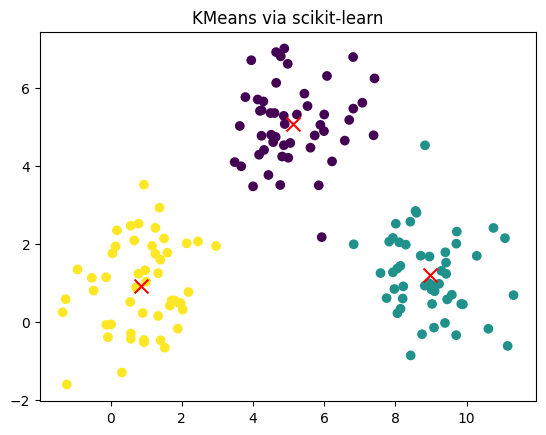

In [35]:
# Way 1: use scikit-learn
# 2. Run k-means with k=3.
kmeans = KMeans(n_clusters=3, random_state=42).fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 3. Visualize the data points,
# colored by their cluster,
# and show the centroids
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title("KMeans via scikit-learn")

Text(0.5, 1.0, 'KMeans from scratch')

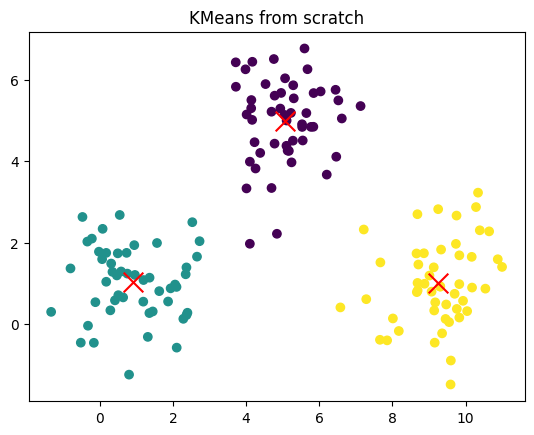

In [34]:
# way 2: code from scratch
k = 3
np.random.seed(42)
indices = np.random.choice(x.shape[0], k, replace=False)
centroids = x[indices]

for iter in range(10):
  # calculate distance
  distance = np.linalg.norm(x[:, np.newaxis] - centroids, axis=2)
  labels = np.argmin(distance, axis=1) # output is the index
  # update new centroids
  new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
  if np.allclose(centroids, new_centroids):
    break
  centroids = new_centroids

# visualize
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
plt.title("KMeans from scratch")



In [12]:
labels

np.int64(0)

In [30]:
centroids

array([[ 4.78101766,  5.60995424],
       [ 1.31498624, -0.31612058],
       [10.54003859,  0.86878447]])

In [21]:
distance

array([[ 5.59353059,  2.14415407,  9.84471167],
       [ 5.7763636 ,  1.40136736,  9.3458298 ],
       [ 5.90444615,  1.18474538,  8.19401669],
       [ 7.61349574,  1.65782813, 10.8981878 ],
       [ 6.45833826,  1.18140425,  9.9020714 ],
       [ 6.19391885,  2.28110583, 10.49867692],
       [ 7.82785255,  1.48172094, 10.78201129],
       [ 8.09460657,  2.7124653 , 11.88074699],
       [ 5.77815015,  2.21093063, 10.0840093 ],
       [ 6.20479923,  0.87413364,  9.3544796 ],
       [ 5.83576973,  1.03036913,  8.67704572],
       [ 5.82944273,  1.5616588 ,  9.58342595],
       [ 4.85959601,  2.00652309,  8.18622776],
       [ 4.84162292,  2.31983875,  9.04410956],
       [ 7.05276187,  1.6670561 , 10.6629748 ],
       [ 5.62878496,  1.45497478,  9.18137883],
       [ 6.02392435,  1.06685434,  8.28796267],
       [ 6.92630901,  1.21383528, 10.2627062 ],
       [ 6.86525575,  0.        ,  9.30083818],
       [ 5.94358257,  1.65235311,  9.7926607 ],
       [ 6.03849093,  3.44508164, 11.150

In [31]:
new_centroids

array(<generator object <genexpr> at 0x7a1223f3fd80>, dtype=object)